## Question 1:

#### Knowing the goal of the Streamroot technology, define a metric to measure Streamroot's performance. Calculate that performance scorefor each of the companies in the dataset.


The performance of the technology is the measure of the ability of one viewer to download the video data. Being in a peer to peer environement the data must be shared. So we want to calculate the debit of downloaded data measured during the timespan (2 min). Furthermore we are looking for getting an overall performance of the technology so our measure must be an average value by the number of viwers. The performance will be the average debit of downloading of each viewer.
This will lead us so to the following metric of Performance meausre(bytes/milisecond):

$$performance = \frac{1}{viewers}\sum_{k=0}^{k=viewers} \frac{cdn+p2p}{timespan}$$

In [101]:
import pandas as pd

data=pd.read_csv("dstest.csv");
timespan=120000;



In [113]:
companies=data['company'].unique()
dataperformance=data[['company','cdn',"p2p"]]
d={};
for C in companies:
    S=0;
    S=S+dataperformance.loc[dataperformance['company']==C,:]['p2p'].sum()+dataperformance.loc[dataperformance['company']==C,:]['cdn'].sum()
    viewers=dataperformance.loc[dataperformance['company']==C,:].size
    S=S/(viewers*timespan);
    d[C]=S;

            


    

C:\Users\khaoula\anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in long_scalars
  


So the performance of each company is the following:

In [120]:
print ('the average peformance for each viewer is : \n')
print(d)

the average peformance for each viewer is : 

{'Streamroot TV': 16331.307745906617, 'Flash Infos': 1625.985081297924, 'Sports News': 124.92195872932375}


## Question 2

#### How can we know whether a payload is the first payload of a viewer's session ?

Such playload has the value sessionDuration that indicates the elapsed time since the beginning of the video session. So if this duration is equal to the timespan which is 2 minutes then it means that the playload is the first one sent by the viewer.

#### Add a column isFirstPayload to the dataset, that must be True if the row represents a payload that was the first payload sent by a viewer, and False otherwise.


In [84]:
timespan=120000;
duration=data["sessionDuration"].values
L=[];
for i in range(len(duration)):
    if (duration[i]==timespan):
        L.append(True);
    else:
        L.append(False);
data["isFirstPayload"]=L

#### Use that column to calculate the number of distinct viewers that sent payloads for each company.

The number of distinct viewers : we sum all the viewers every time a new viewer appear so we should sum all the viewers accordint to their fir playload otherwise he will be considered twice.

In [86]:
companies=data['company'].unique()
dataviewers=data[['company','isFirstPayload']].loc[data['isFirstPayload']==True,:]
number={};
for C in companies:
    viewers=dataviewers.loc[data['company']==C,:].size
    number[C]=viewers
    
    

The number of distinct viewers of each company is then:

In [87]:
number

{'Streamroot TV': 39828, 'Flash Infos': 1610, 'Sports News': 230}

## Question 3 

#### Let's consider a viewer A who starts a video at T=0, then has a playback error at T = 2 minutes 30 seconds, and then another one at T=6 minutes 20 seconds. What will be the values of the fields playbackErrorCount and totalPlaybackErrorCount in the first 5 payloads sent by viewer A ?
 

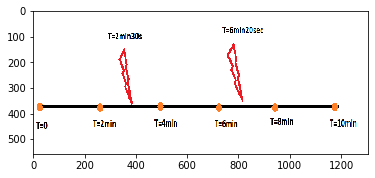

In [42]:
import matplotlib.image as mpimg 
import matplotlib.pyplot as plt 
  
# Read Images 
img = mpimg.imread('playloads.png') 
  
# Output Images 
plt.imshow(img) 


As the image just above shows, there are two errors happened at two different times so for the first playload nothing happened and the total errors number is then nul ,  it's not the case in the first playload, we notice an error and it's the only one so th total is equal to one an so on we can arrive to the following result:

playload number:------------------------playbackErrorCount:------------------------TotalplaybackErrorCount:  

                   1                           0                                0

                   2                           1                                1
                   
                   3                           0                                1
                   
                   4                           1                                2
                   
                   5                           0                                2

#### Calculate the number of distinct viewers that had at least 1 playback error during their session.


In [92]:
dataviewers2=data[['company','totalPlaybackErrorCount']].loc[data['totalPlaybackErrorCount']==1,:]
viewers={};
companies=data['company'].unique()
for C in companies:
    viewers[C]=dataviewers2.loc[dataviewers2['company']==C,:].size

I chose that the condition be equals to one even if it's at least one so that I can avoid counting the same viwer twice. Furthermore when the total number of errors of one viewer is more than one this would necessiraly mean that we passed the case when the total error number is one and that was his first playload with an error. So the number of distinct viewers that has at least 1 playback error is:

In [93]:
viewers

{'Streamroot TV': 0, 'Flash Infos': 2, 'Sports News': 486}

## Question 4:

#### Let's focus only customer Streamroot TV for all the Question 4. We define the "concurrency" as the number of viewers connected simustaneously on the same content, i.e the number of payloads we received during a given 2 minutes window on a given content.
#### Add a column "readableDate" to the dataset that will be the beginning of the 2 minutes window during which the payload was sent. For example, if a payload was sent at 11:35, the column "readableDate" should be 11:34


In [109]:
from datetime import datetime

data['readableDate']=data['timestamp'].apply(lambda x: str(datetime.fromtimestamp(int(x/1000.0)).isoformat()[-8:-3] ))
                                                                                                         
                                  

In [110]:
data['readableDate']

0         05:23
1         05:25
2         05:27
3         05:29
4         05:31
          ...  
385160    07:50
385161    07:52
385162    07:54
385163    07:56
385164    07:58
Name: readableDate, Length: 385165, dtype: object

#### Plot the concurrency time series for the content content-05335 .

For this question, I tend to track the variation of the concurrency during the time. So, for each time label of a certain playload we sum all the viewers that sent at that time(considering the attendancy of a viewer and its commitement to sen a playload)

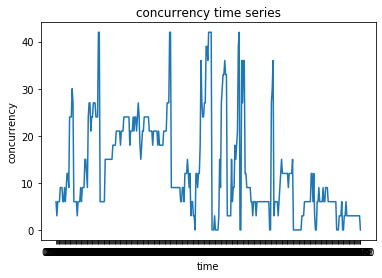

In [96]:
import matplotlib.pyplot as plt
concurrency=[]
duration=data['readableDate'].unique()
dataviewers=(data[['company','content','readableDate']].loc[data['company']=='Streamroot TV',:]).loc[data['content']=='content-05335',:]

for t in duration:
    concurrency.append(dataviewers.loc[dataviewers['readableDate']==t,:].size)
   
    
plt.plot(duration,concurrency)
plt.title("concurrency time series")
plt.xlabel("time")
plt.ylabel("concurrency")
plt.show()

            
            
            


#### What is the average performance measured when the concurrency is lower than 10 ?


Here, we are applying the performance metric but only for the playloads that have been sent at the time we calculate it the considered concurrency which lower than 10

In [116]:

dataper=data[['company','p2p','cdn','readableDate']].loc[data['company']=='Streamroot TV',:]
timespan=120000
S=0
viewers=0
for i in range(len(concurrency)):
    if (concurrency[i]<10):
        S=S+dataper.loc[dataper['readableDate']==duration[i],:]['p2p'].sum()+dataper.loc[dataper['readableDate']==duration[i],:]['cdn'].sum()
        viewers=viewers+dataper.loc[dataper['readableDate']==duration[i],:].size

S=S/(viewers*timespan);

                
        

C:\Users\khaoula\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in long_scalars
  # Remove the CWD from sys.path while we load stuff.


In [117]:
print('the average performance for a concurrency lower than 10 is: \n')
print(S)


the average performance for a concurrency lower than 10 is: 

6122.317001941656


#### Starting from which concurrency can we say there is a 75% chance that the performance on a content is higher than 80% ?

I couldn't answer this question because the definition that I gave to the performance metric doesn't give a percentage as a return but the average debit of download for each viewer.